# **Import** **the** **Dependencies**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\AppData\Local\Temp\ipykernel_32052\206833073.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Data Collection & Processing**

In [2]:
# Load the dataset
column_names = ['ID', 'ENTITY', 'SENTIMENT', 'COMMENTS']
data = pd.read_csv('C:/Users/Dell/Documents/T.Y.C.S NOTES/Mini project/ds task/twitterAnalysis.csv', header=0, names=column_names)


In [3]:
# Explore the data
data.head()

,ID,ENTITY,SENTIMENT,COMMENTS
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Explore the data
data.tail()

,ID,ENTITY,SENTIMENT,COMMENTS
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
data.shape

(74681, 4)

In [6]:
#Count of unique entities
ENTITY_count = data['ENTITY'].value_counts()
print(ENTITY_count)

ENTITY
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   ENTITY     74681 non-null  object
 2   SENTIMENT  74681 non-null  object
 3   COMMENTS   73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# **Check** **Duplicates**

In [8]:
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
duplicated_rows.count()

ID           2700
ENTITY       2700
SENTIMENT    2700
COMMENTS     2340
dtype: int64

In [9]:
#drop duplicates
data.drop_duplicates(inplace= True)

# **Check missing value**

In [10]:
data.isnull().sum()

ID             0
ENTITY         0
SENTIMENT      0
COMMENTS     326
dtype: int64

In [11]:
#drop missing value
data = data.dropna()

In [12]:
data.isnull().sum()

ID           0
ENTITY       0
SENTIMENT    0
COMMENTS     0
dtype: int64

In [13]:
#number of unique values
data.nunique()

ID           12447
ENTITY          32
SENTIMENT        4
COMMENTS     69490
dtype: int64

In [14]:
for i in range(5):
    print(f"{i+1}: {data['COMMENTS'][i]}  -> {data['SENTIMENT'][i]}")


1: I am coming to the borders and I will kill you all,  -> Positive
2: im getting on borderlands and i will kill you all,  -> Positive
3: im coming on borderlands and i will murder you all,  -> Positive
4: im getting on borderlands 2 and i will murder you me all,  -> Positive
5: im getting into borderlands and i can murder you all,  -> Positive


# **Sentiment analysis**

In [15]:
data['SENTIMENT'].value_counts()

SENTIMENT
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

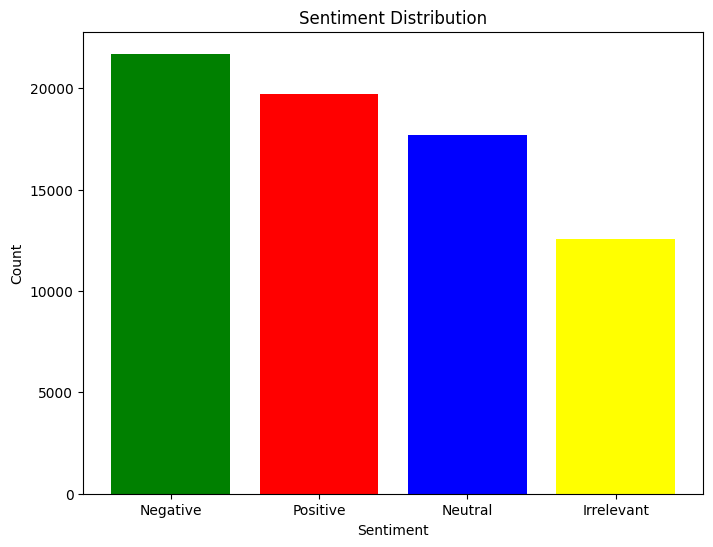

In [16]:
SENTIMENT_distribution = data['SENTIMENT'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(SENTIMENT_distribution.index, SENTIMENT_distribution.values, color=['green', 'red','blue','yellow'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

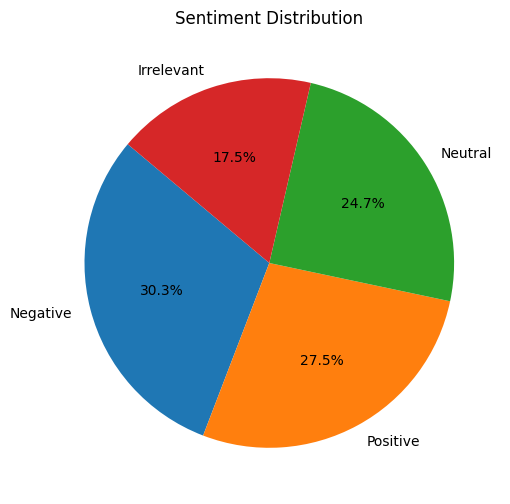

In [17]:
# Visualize sentiment distribution using piechart

SENTIMENT_distribution = data['SENTIMENT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(SENTIMENT_distribution, labels=SENTIMENT_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_32052\1974336424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SENTIMENT', data=data, palette='Set2')


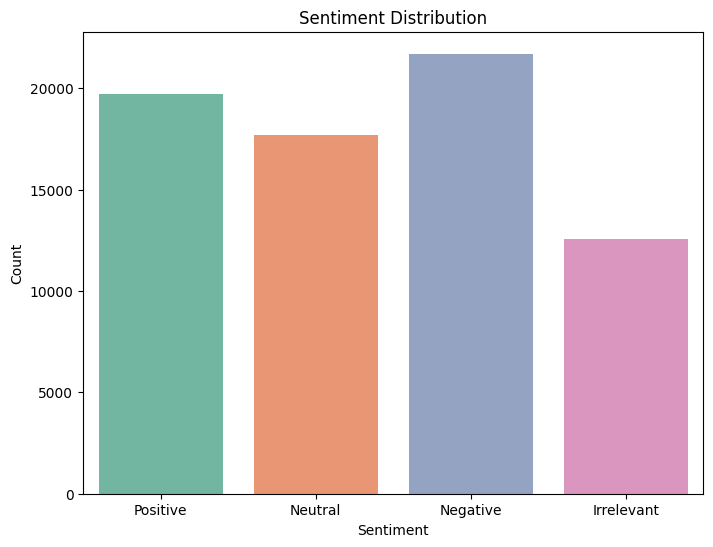

In [18]:
# Visualize sentiment distribution using countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='SENTIMENT', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_32052\1481817018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ENTITY', data=data, palette='Set2')


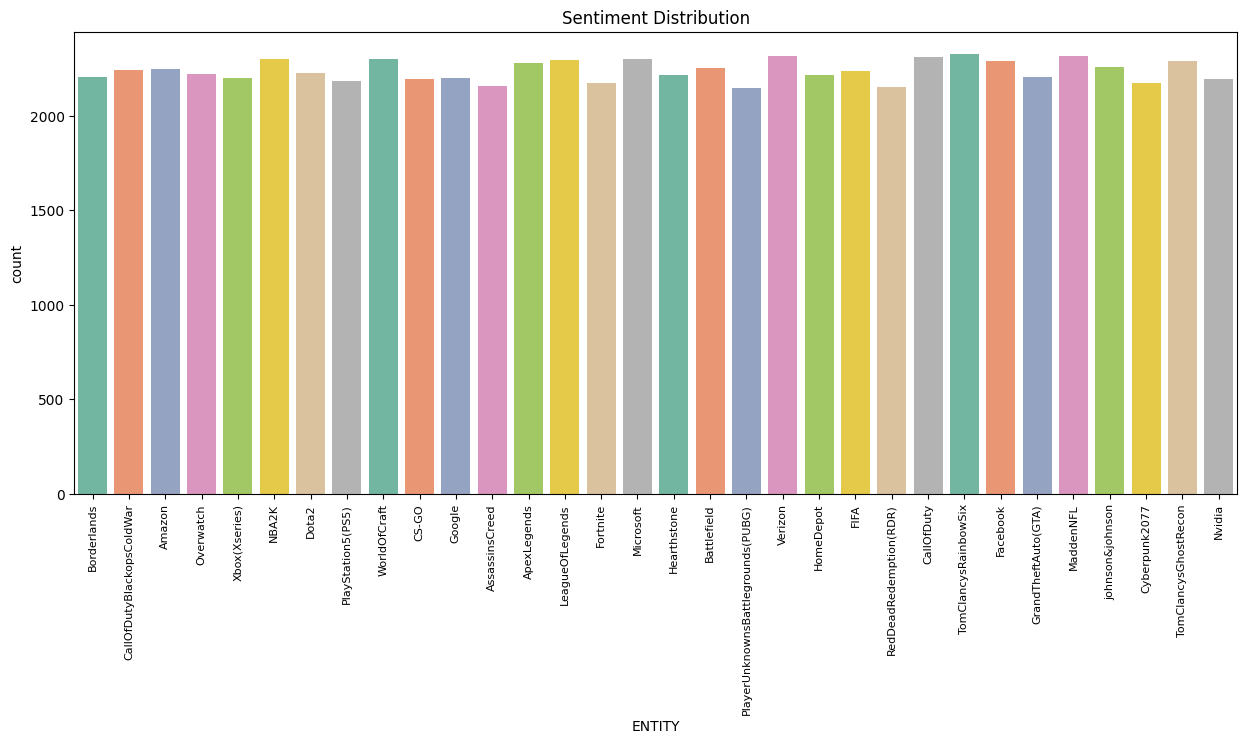

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ENTITY', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xticks(rotation=90, fontsize=8)
plt.show()

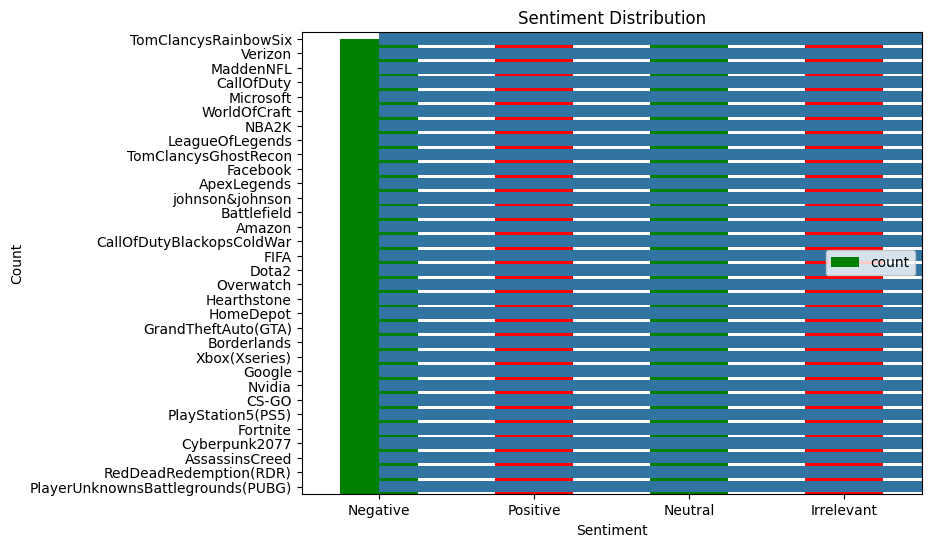

In [20]:
plt.figure(figsize=(8, 6))
SENTIMENT_distribution.plot(kind='bar', color=['green', 'red'])
sns.barplot(x=data['ENTITY'].value_counts(),y= data['ENTITY'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)
plt.show()

# **WordCloud**


In [24]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
# Data preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+\.com\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+','',text) # Remove usernames
    text = re.sub(r'\#','',text) # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert text to lowercase
    return text

In [27]:
data['COMMENTS'] = data['COMMENTS'].apply(preprocess_text)

In [28]:
data.head()

,ID,ENTITY,SENTIMENT,COMMENTS
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [29]:
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['ENTITY'], data['SENTIMENT'], test_size=0.2, random_state=42)

# **Feature extraction using TF-IDF**

In [30]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.8)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [32]:
# Predict on test set
y_pred = model.predict(X_test_tfidf)


In [33]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4169981159723676
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.37      0.27      0.31      2455
    Negative       0.47      0.44      0.46      4433
     Neutral       0.41      0.47      0.44      3532
    Positive       0.39      0.44      0.41      3911

    accuracy                           0.42     14331
   macro avg       0.41      0.40      0.40     14331
weighted avg       0.42      0.42      0.41     14331



In [34]:
# Define plot_wordcloud function
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()


In [35]:
# Separate positive and negative tweets for visualization
positive_tweets = data[data['SENTIMENT'] == 'positive']['ENTITY'].values
negative_tweets = data[data['SENTIMENT'] == 'negative']['ENTITY'].values

In [36]:
# Convert arrays to single strings
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

In [37]:
# Generate word cloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Happy')
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Good')

# Generate word cloud for negative tweets
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Unlucky')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate('Bad')

In [38]:
# Plot word clouds
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

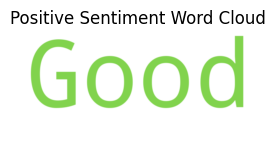

In [39]:
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis("off")

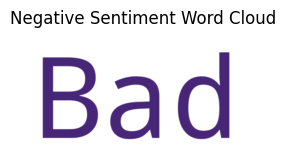

In [40]:
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis("off")
plt.show()